In [8]:
import cv2
import numpy as np
image = cv2.imread('girlimg.png')

new_width, new_height = 200, 200
# Resizing
linear_resized = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
nearest_resized = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_NEAREST)
polynomial_resized = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)


In [2]:
gaussian_blurred = cv2.GaussianBlur(image, (5, 5), 0)

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

digits = load_digits()
X = digits.data
y = digits.target

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split


data = pd.read_csv('/content/mnist_test.csv')
X = data.drop('label', axis=1).values
y = data['label'].values


In [5]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Create model
svm = SVC(kernel='linear')
nb = GaussianNB()

# Evaluate model using KFold cross-validation
cv = KFold(n_splits=5, shuffle=True)

svm_scores = cross_val_score(svm, X, y, cv=cv, scoring='accuracy')
nb_scores = cross_val_score(nb, X, y, cv=cv, scoring='accuracy')

print('SVM Accuracy:', svm_scores.mean())
print('Naive Bayes Accuracy:', nb_scores.mean())


SVM Accuracy: 0.9225999999999999
Naive Bayes Accuracy: 0.5691999999999999


Accuracy: 0.9777777777777777
Precision: 0.9791964938122952
Recall: 0.9781692242114237
F1-Score: 0.9785455500691013
Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  0  1]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  1  0  0  1  0 37]]
AUC: 0.999825026158258


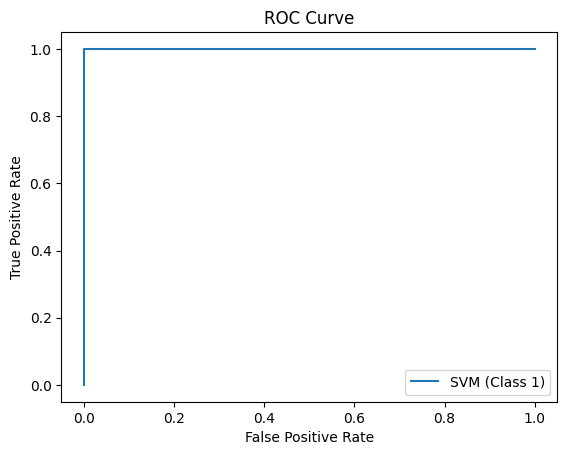

In [14]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

mnist = datasets.load_digits()

X = mnist.data
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
y_probs = svm.predict_proba(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('F1-Score:', f1_score(y_test, y_pred, average='macro'))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

auc = roc_auc_score(y_test, y_probs, multi_class='ovr')
print('AUC:', auc)

fpr, tpr, _ = roc_curve(y_test == 1, y_probs[:, 1])
plt.plot(fpr, tpr, label='SVM (Class 1)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
